In [101]:
# Import des librairies essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler


# ===== Load prepared datasets =====
df_fe = pd.read_csv("C:/Users/meria/Downloads/ML/MLproject/eng_data.csv")
df_ready = pd.read_csv("C:/Users/meria/Downloads/ML/MLproject/prepared_data.csv")
X_prepared = np.load("C:/Users/meria/Downloads/ML/MLproject/X_prepared.npy")

print("df_ready shape:", df_ready.shape)
display(df_ready.head(5))
print("X_prepared shape:", X_prepared.shape)


df_ready shape: (30000, 665)


,Median_Salary_USD,Experience_Required_Years,Job_Openings_2024,Projected_Openings_2030,Remote_Work_Ratio_%,Automation_Risk_%,Gender_Diversity_%,Education_Num,AI_Impact_Num,Job_Status_Num,...,Job_Status_Increasing,AI_Impact_Level_Low,AI_Impact_Level_Moderate,Location_Brazil,Location_Canada,Location_China,Location_Germany,Location_India,Location_UK,Location_USA
0,-1.395182,-0.833491,-1.231978,0.442275,0.211404,-0.760726,-0.309688,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.225715,0.816517,-1.327050,0.394481,-1.140171,1.375642,0.949982,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.544813,-0.998491,-0.594779,-1.367596,1.449398,0.793470,-0.512300,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.216677,0.816517,0.745679,-0.353817,-1.655254,1.731413,0.913511,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.847490,0.486516,0.316103,0.809970,0.135453,-0.434863,1.307737,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


X_prepared shape: (30000, 665)


In [96]:
# ===== PCA =====
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df_ready.select_dtypes(include=[np.number]))
print("Nombre de composantes conservées :", X_pca.shape[1])


Nombre de composantes conservées : 299


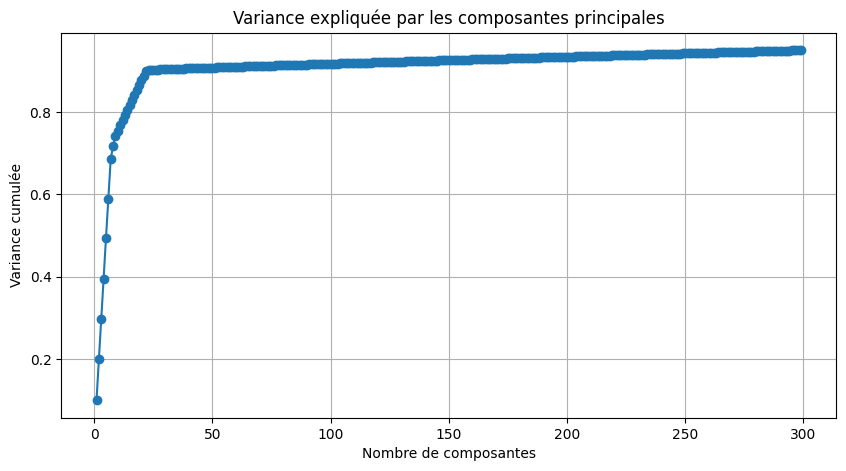

In [78]:
# Variance expliquée 
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Variance expliquée par les composantes principales')
plt.grid(True)
plt.show()


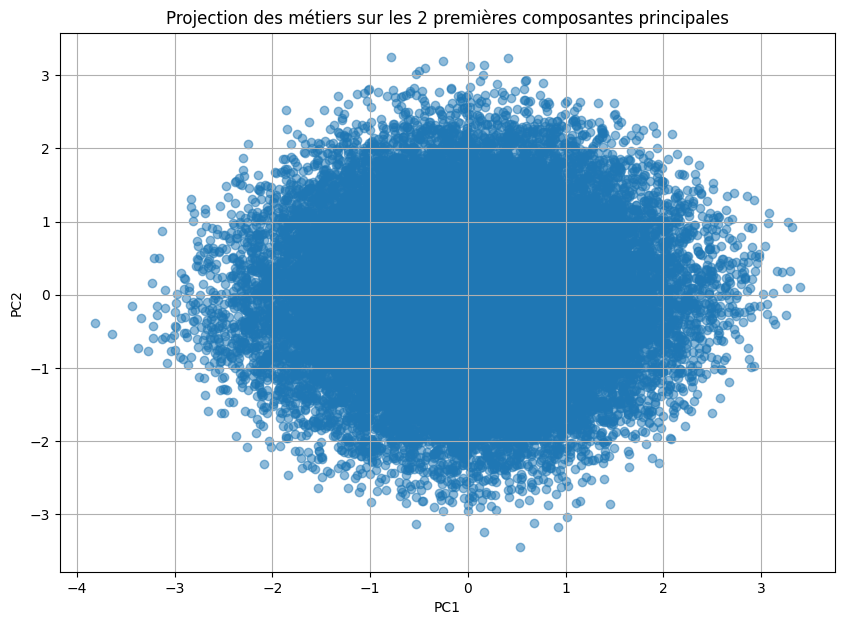

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des métiers sur les 2 premières composantes principales')
plt.grid(True)
plt.show()

In [98]:
# Contribution des features à la PC1 et PC2
pca_features = pd.DataFrame(pca.components_[:2], columns=df_ready.columns, index=['PC1','PC2']).T
pca_features.sort_values(by='PC1', ascending=False).head(10)  # top 10 features PC1


,PC1,PC2
Gender_Diversity_%,0.492227,-0.567178
Median_Salary_USD,0.471717,-0.193009
Automation_Risk_%,0.447510,0.396536
Projected_Openings_2030,0.411850,-0.097999
Remote_Work_Ratio_%,0.308757,0.253954
Experience_Required_Years,0.259839,0.622697
Job_Openings_2024,0.048097,-0.147627
Job_Status_Increasing,0.003951,0.005381
AI_Impact_Level_Moderate,0.003493,0.005342
Location_Brazil,0.003383,0.000940


C:\Users\meria\AppData\Local\Temp\ipykernel_9288\2559687612.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
C:\Users\meria\AppData\Local\Temp\ipykernel_9288\2559687612.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


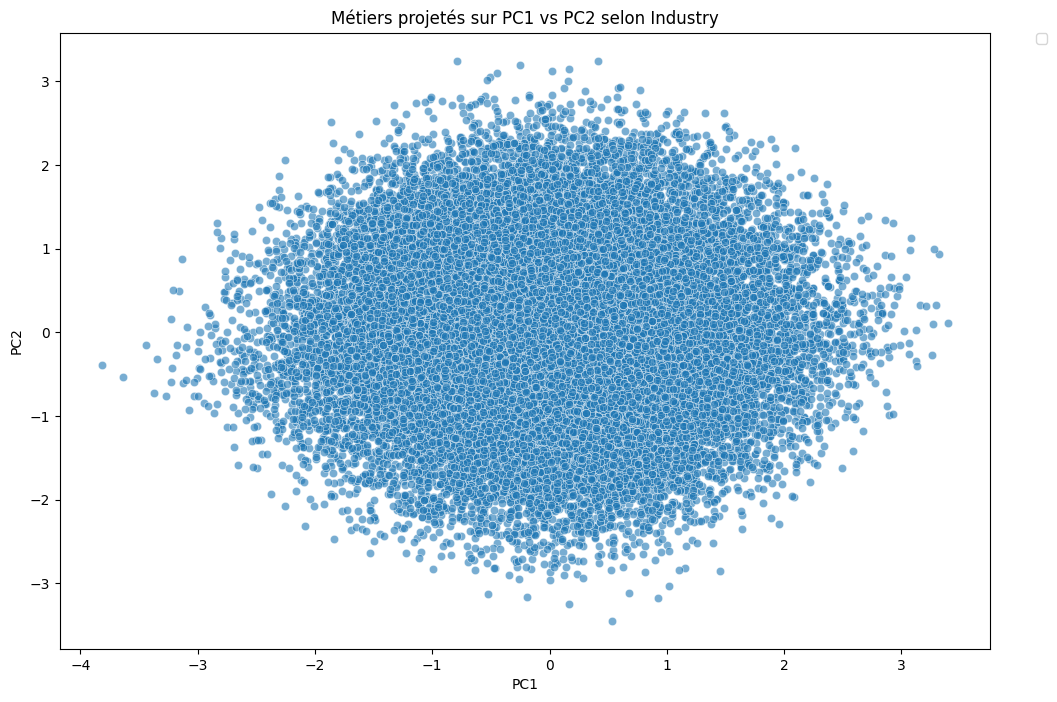

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
# Réduire les 6 features à 2 composantes pour la visualisation
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], 
             alpha=0.6, palette='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Métiers projetés sur PC1 vs PC2 selon Industry')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# **clustering** 

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [109]:
X_country = df_fe[['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD']]


In [112]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_country)


In [113]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
df_fe['DBSCAN_Country_Cluster'] = dbscan.fit_predict(X_scaled)


In [114]:
# Moyenne de Job_Growth_Rate par cluster et par pays
country_summary = df_fe.groupby(['Location', 'DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean()
print(country_summary.sort_values(ascending=False))


Location   DBSCAN_Country_Cluster
Canada     -1                        8945.098039
Brazil     -1                        8505.769231
UK         -1                        8219.000000
India      -1                        8171.631408
China      -1                        8148.509434
Australia   0                         146.633155
Brazil      0                         143.516858
China       0                         142.720580
USA         0                         141.899924
India       0                         138.961402
Germany     0                         138.212545
Canada      0                         137.153955
UK          0                         117.611629
Name: Job_Growth_Rate_%, dtype: float64


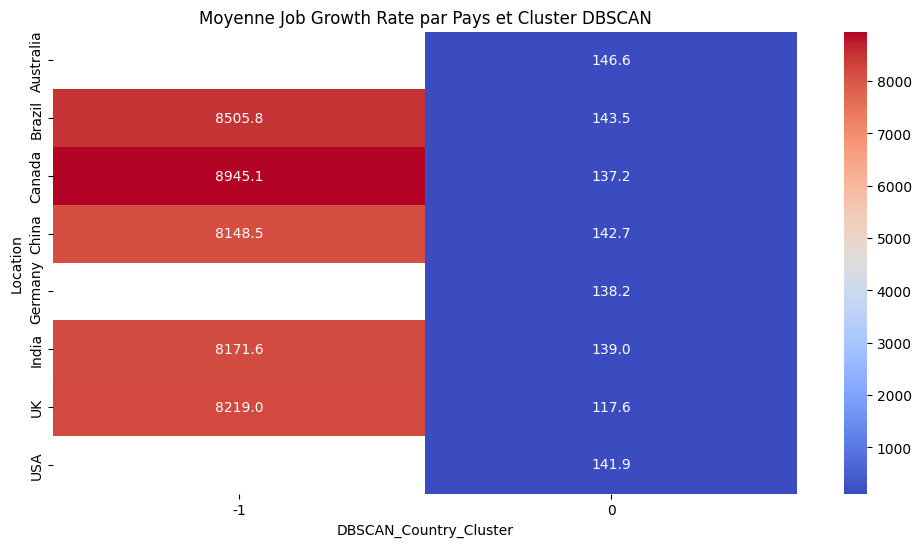

In [116]:
heatmap_data = df_fe.pivot_table(
    index='Location',
    columns='DBSCAN_Country_Cluster',
    values='Job_Growth_Rate_%',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Moyenne Job Growth Rate par Pays et Cluster DBSCAN')
plt.show()


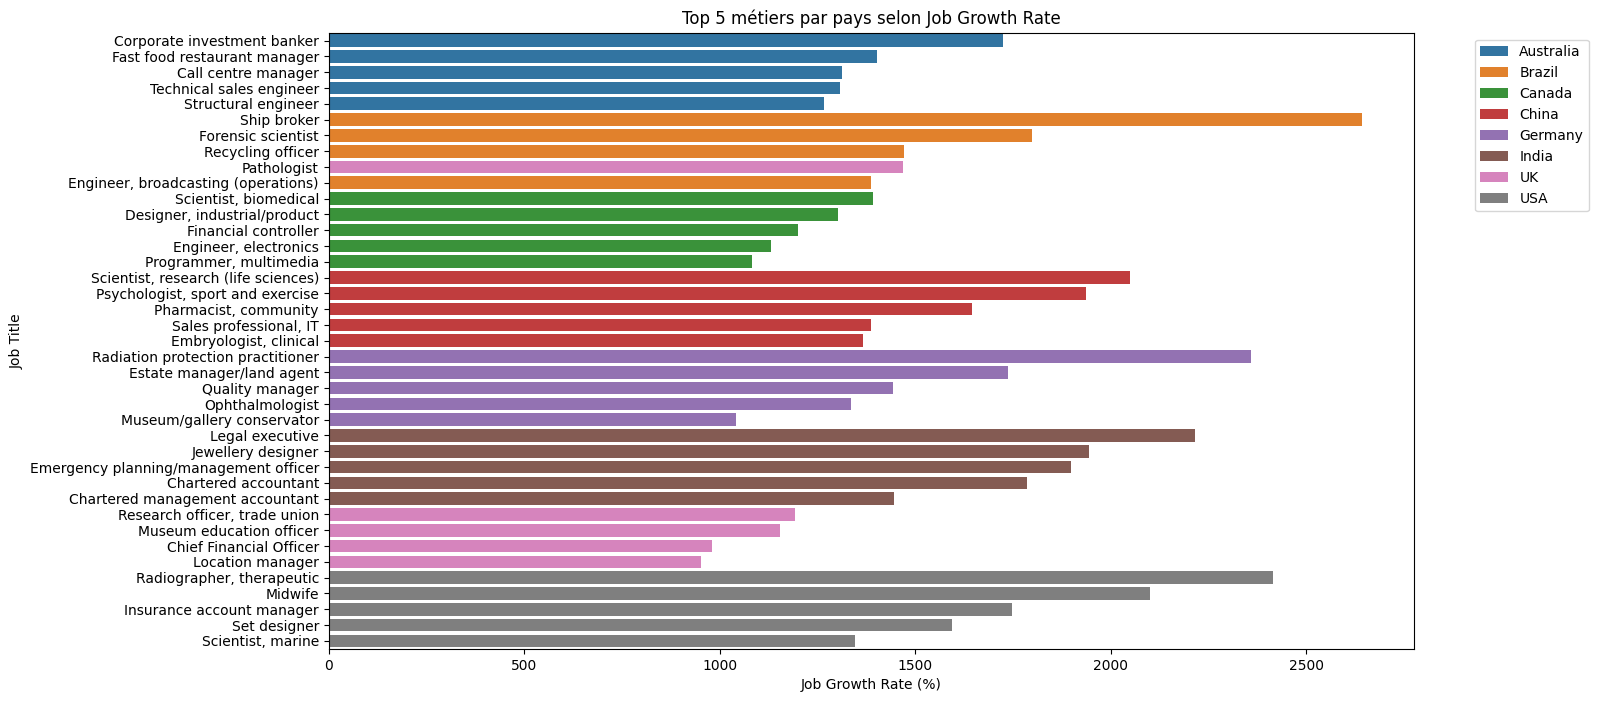

In [118]:
# Top 5 métiers par pays selon Job_Growth_Rate_%
top_jobs = df_fe.groupby(['Location','Job_Title'])['Job_Growth_Rate_%'].mean().reset_index()
top_jobs_sorted = top_jobs.sort_values(['Location','Job_Growth_Rate_%'], ascending=[True,False])
top5_jobs = top_jobs_sorted.groupby('Location').head(5)

plt.figure(figsize=(14,8))
sns.barplot(
    x='Job_Growth_Rate_%',
    y='Job_Title',
    hue='Location',
    data=top5_jobs,
    dodge=False
)
plt.title('Top 5 métiers par pays selon Job Growth Rate')
plt.xlabel('Job Growth Rate (%)')
plt.ylabel('Job Title')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


In [119]:
# Moyennes par pays et cluster DBSCAN
country_cluster_summary = df_fe.groupby(['Location', 'DBSCAN_Country_Cluster'])[
    ['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD', 'Experience_Required_Years']
].mean().round(2)

print(country_cluster_summary)


                                  Job_Growth_Rate_%  Automation_Risk_%  \
Location  DBSCAN_Country_Cluster                                         
Australia  0                                 146.63              50.30   
Brazil    -1                                8505.77              26.20   
           0                                 143.52              50.12   
Canada    -1                                8945.10               8.34   
           0                                 137.15              50.24   
China     -1                                8148.51              43.23   
           0                                 142.72              49.85   
Germany    0                                 138.21              50.00   
India     -1                                8171.63              86.90   
           0                                 138.96              49.99   
UK        -1                                8219.00              95.67   
           0                          

In [120]:
# Métiers à forte croissance par pays
high_growth = df_fe[df_fe['Job_Growth_Rate_%'] > df_fe['Job_Growth_Rate_%'].quantile(0.9)]
high_growth.groupby('Location')['Job_Title'].value_counts().head(10)

# Métiers à forte décroissance par pays
low_growth = df_fe[df_fe['Job_Growth_Rate_%'] < df_fe['Job_Growth_Rate_%'].quantile(0.1)]
low_growth.groupby('Location')['Job_Title'].value_counts().head(10)


Location   Job_Title                          
Australia  Careers adviser                        4
           Higher education lecturer              4
           Museum/gallery curator                 4
           Psychologist, occupational             4
           Translator                             4
           Advice worker                          3
           Ergonomist                             3
           Exhibitions officer, museum/gallery    3
           Field seismologist                     3
           Geneticist, molecular                  3
Name: count, dtype: int64

In [121]:
top_jobs_by_country = df_fe.groupby(['Location', 'DBSCAN_Country_Cluster'])['Job_Title'] \
                            .value_counts() \
                            .groupby(level=0, group_keys=False) \
                            .head(5)

print(top_jobs_by_country)


Location   DBSCAN_Country_Cluster  Job_Title                                       
Australia   0                      Administrator, sports                               15
                                   Information officer                                 14
                                   Print production planner                            14
                                   Psychotherapist, child                              13
                                   Actuary                                             12
Brazil     -1                      Advice worker                                        1
            0                      Hotel manager                                       14
                                   Insurance broker                                    14
                                   Architectural technologist                          13
                                   Child psychotherapist                               13
Canada     -1   

In [122]:
country_cluster_summary = df_fe.groupby(['Location', 'DBSCAN_Country_Cluster'])[
    ['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD']
].mean().round(2)

print(country_cluster_summary)


                                  Job_Growth_Rate_%  Automation_Risk_%  \
Location  DBSCAN_Country_Cluster                                         
Australia  0                                 146.63              50.30   
Brazil    -1                                8505.77              26.20   
           0                                 143.52              50.12   
Canada    -1                                8945.10               8.34   
           0                                 137.15              50.24   
China     -1                                8148.51              43.23   
           0                                 142.72              49.85   
Germany    0                                 138.21              50.00   
India     -1                                8171.63              86.90   
           0                                 138.96              49.99   
UK        -1                                8219.00              95.67   
           0                          

In [123]:
for country in df_fe['Location'].unique():
    print(f"=== {country} ===")
    for cluster in df_fe['DBSCAN_Country_Cluster'].unique():
        subset = df_fe[(df_fe['Location']==country) & (df_fe['DBSCAN_Country_Cluster']==cluster)]
        if len(subset) == 0:
            continue
        top_jobs = [str(job) for job in subset['Job_Title'].value_counts().head(5).index.tolist()]
        mean_growth = subset['Job_Growth_Rate_%'].mean().round(2)
        mean_salary = subset['Median_Salary_USD'].mean().round(2)
        mean_risk = subset['Automation_Risk_%'].mean().round(2)
        print(f"Cluster {cluster}:")
        print(f"  Croissance moyenne : {mean_growth}%")
        print(f"  Salaire moyen : {mean_salary} USD")
        print(f"  Risque d'automatisation : {mean_risk}%")
        print(f"  Métiers principaux : {', '.join(top_jobs)}")
        print(f"  Interprétation : ...\n")


=== UK ===
Cluster 0:
  Croissance moyenne : 117.61%
  Salaire moyen : 90335.88 USD
  Risque d'automatisation : 50.26%
  Métiers principaux : Herpetologist, Psychiatric nurse, Therapist, sports, Designer, television/film set, Surveyor, insurance
  Interprétation : ...

Cluster -1:
  Croissance moyenne : 8219.0%
  Salaire moyen : 116298.84 USD
  Risque d'automatisation : 95.67%
  Métiers principaux : Administrator
  Interprétation : ...

=== USA ===
Cluster 0:
  Croissance moyenne : 141.9%
  Salaire moyen : 90438.5 USD
  Risque d'automatisation : 50.44%
  Métiers principaux : Surveyor, insurance, Warehouse manager, Insurance claims handler, Hydrogeologist, Air traffic controller
  Interprétation : ...

=== Canada ===
Cluster 0:
  Croissance moyenne : 137.15%
  Salaire moyen : 89712.7 USD
  Risque d'automatisation : 50.24%
  Métiers principaux : Scientist, physiological, Water engineer, Curator, Facilities manager, Environmental health practitioner
  Interprétation : ...

Cluster -1:
  C

**K_MEANS** 

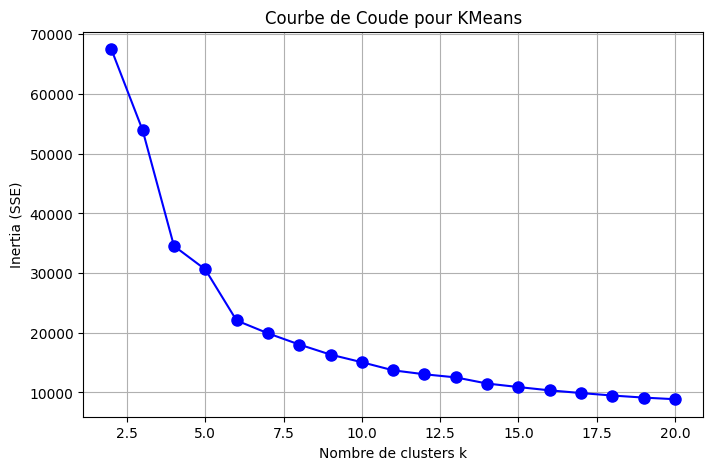

In [130]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Essai de plusieurs k
inertia = []
K_range = range(2, 21)  # tester k de 2 à 20

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisation de la courbe de coude
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertia (SSE)")
plt.title("Courbe de Coude pour KMeans")
plt.grid(True)
plt.show()


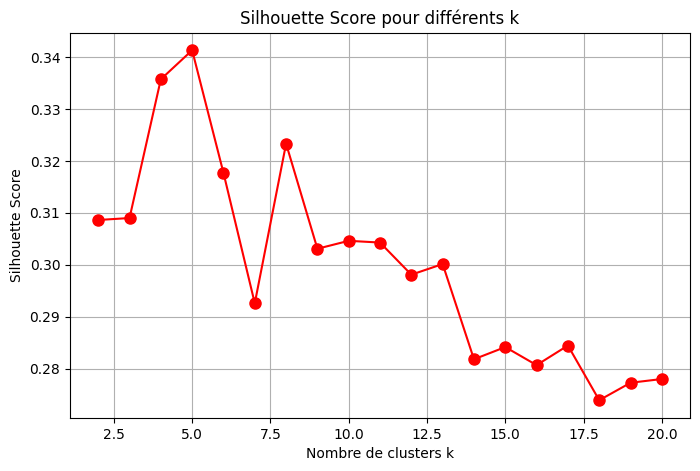

Meilleur k selon Silhouette Score : 5


In [135]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

sil_scores = []
for k in K_range:
    labels = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=512).fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels, sample_size=2000, random_state=42)
    sil_scores.append(score)


plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, 'ro-', markersize=8)
plt.xlabel("Nombre de clusters k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score pour différents k")
plt.grid(True)
plt.show()

best_k = K_range[sil_scores.index(max(sil_scores))]
print("Meilleur k selon Silhouette Score :", best_k)


In [137]:

kmeans = KMeans(n_clusters=best_k, random_state=42)
df_fe['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


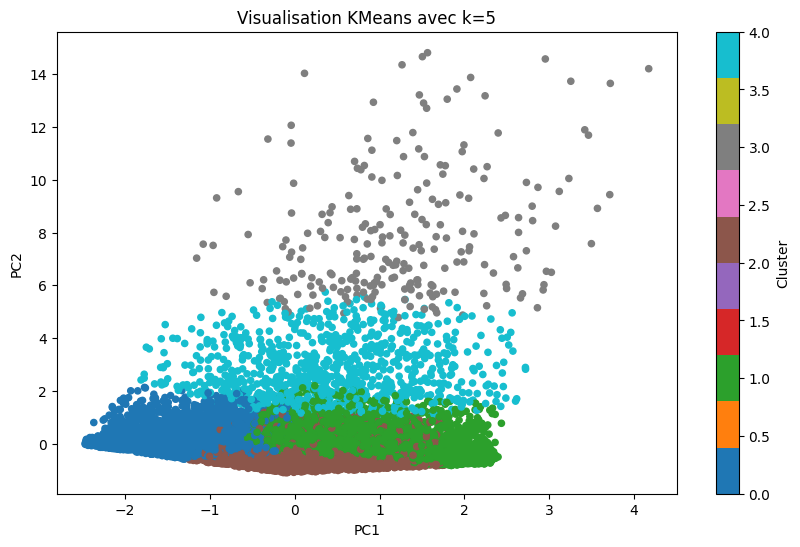

In [138]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_ready['KMeans_Cluster'], cmap='tab10', s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Visualisation KMeans avec k={best_k}")
plt.colorbar(label="Cluster")
plt.show()


In [143]:
for country in df_fe['Location'].unique():
    print(f"=== {country} ===")
    for cluster in df_fe['KMeans_Cluster'].unique():
        subset = df_fe[(df_fe['Location'] == country) & (df_fe['KMeans_Cluster'] == cluster)]
        if len(subset) == 0:
            continue
        # Top 5 métiers du cluster
        top_jobs = [str(job) for job in subset['Job_Title'].value_counts().head(5).index.tolist()]
        # Moyennes des indicateurs
        mean_growth = subset['Job_Growth_Rate_%'].mean().round(2)
        mean_salary = subset['Median_Salary_USD'].mean().round(2)
        mean_risk = subset['Automation_Risk_%'].mean().round(2)
        
        # Affichage
        print(f"Cluster {cluster}:")
        print(f"  Croissance moyenne : {mean_growth}%")
        print(f"  Salaire moyen : {mean_salary} USD")
        print(f"  Risque d'automatisation : {mean_risk}%")
        print(f"  Métiers principaux : {', '.join(top_jobs)}")
        print(f"  Interprétation : ...\n")


=== UK ===
Cluster 0:
  Croissance moyenne : 50.42%
  Salaire moyen : 58882.12 USD
  Risque d'automatisation : 31.76%
  Métiers principaux : Therapist, sports, Gaffer, Surveyor, insurance, Solicitor, Scotland, Administrator, Civil Service
  Interprétation : ...

Cluster 1:
  Croissance moyenne : 55.97%
  Salaire moyen : 89595.03 USD
  Risque d'automatisation : 80.75%
  Métiers principaux : Health and safety adviser, Fish farm manager, Maintenance engineer, Quarry manager, Biomedical scientist
  Interprétation : ...

Cluster 2:
  Croissance moyenne : 45.93%
  Salaire moyen : 121836.54 USD
  Risque d'automatisation : 31.83%
  Métiers principaux : Engineer, biomedical, Occupational hygienist, Media planner, Chemical engineer, Marine scientist
  Interprétation : ...

Cluster 4:
  Croissance moyenne : 1743.11%
  Salaire moyen : 92291.94 USD
  Risque d'automatisation : 55.63%
  Métiers principaux : Event organiser, Minerals surveyor, Commercial/residential surveyor, Senior tax professional/t

# comparaison 

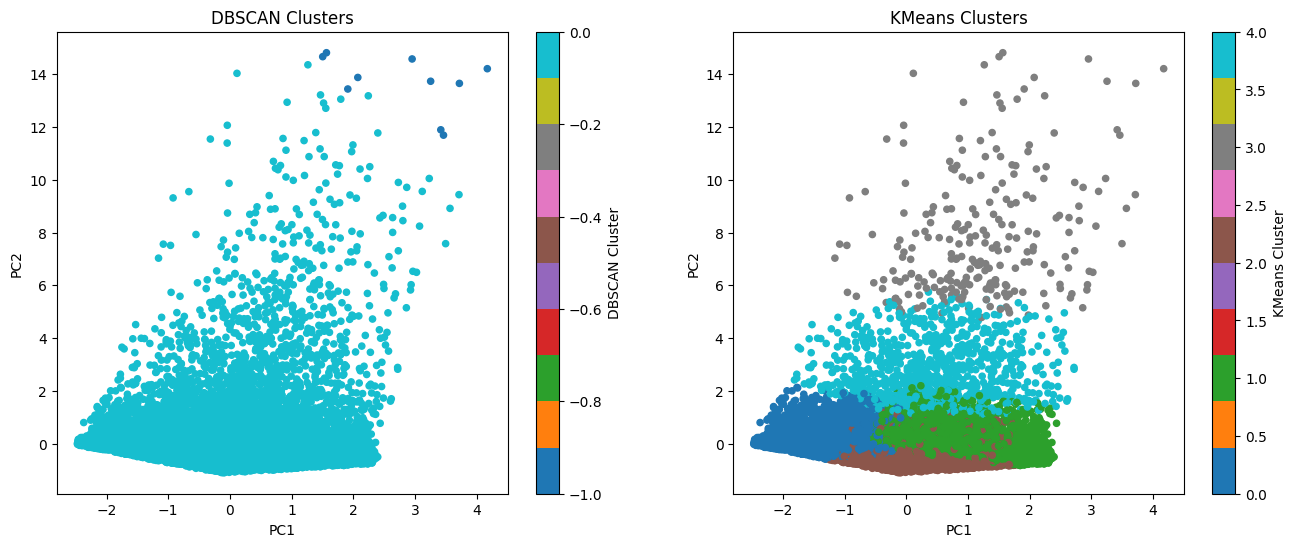

In [144]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ---- DBSCAN ----
scatter = axes[0].scatter(X_pca[:,0], X_pca[:,1], 
                          c=df_ready['DBSCAN_Country_Cluster'], cmap='tab10', s=20)
axes[0].set_title("DBSCAN Clusters")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig.colorbar(scatter, ax=axes[0], label='DBSCAN Cluster')

# ---- KMeans ----
scatter2 = axes[1].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_ready['KMeans_Cluster'], cmap='tab10', s=20)
axes[1].set_title("KMeans Clusters")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
fig.colorbar(scatter2, ax=axes[1], label='KMeans Cluster')

plt.show()


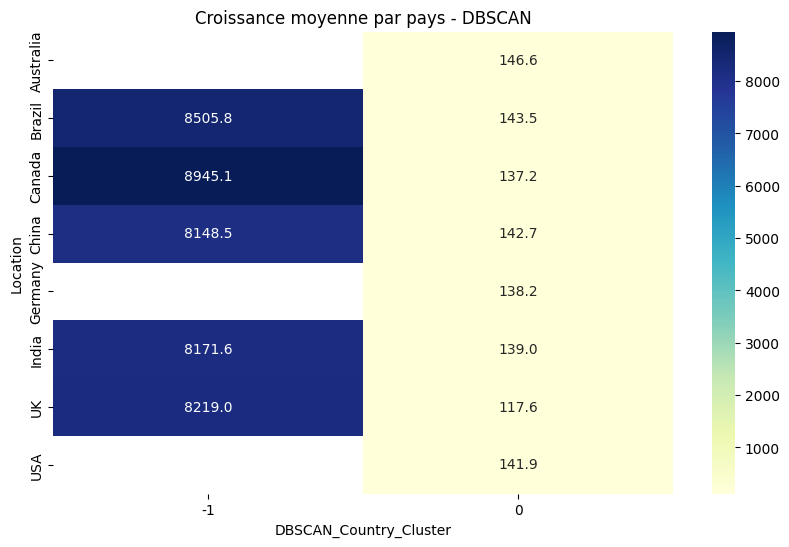

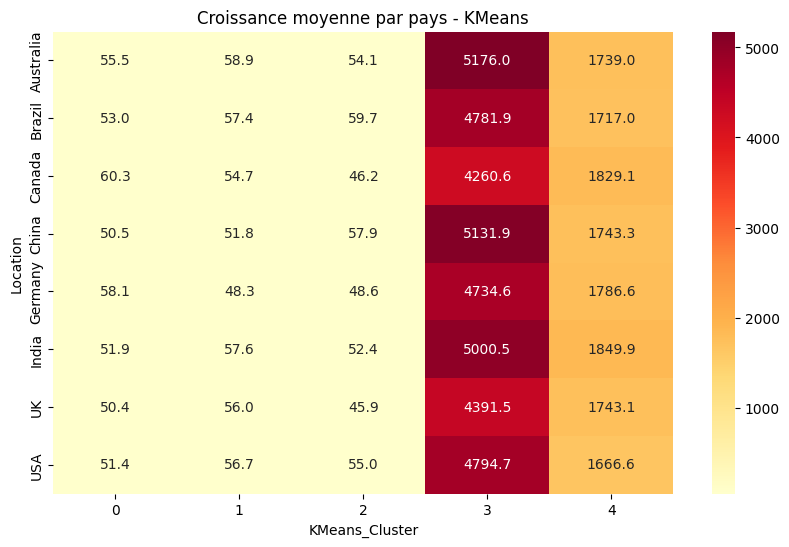

In [146]:
import seaborn as sns

# Exemple pour DBSCAN
heatmap_db = df_fe.groupby(['Location','DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_db, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Croissance moyenne par pays - DBSCAN")
plt.show()

# Exemple pour KMeans
heatmap_km = df_fe.groupby(['Location','KMeans_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_km, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Croissance moyenne par pays - KMeans")
plt.show()


In [148]:
top_jobs_km = df_fe.groupby('KMeans_Cluster')['Job_Title'].apply(lambda x: x.value_counts().head(3).index.tolist())
top_jobs_db = df_fe.groupby('DBSCAN_Country_Cluster')['Job_Title'].apply(lambda x: x.value_counts().head(3).index.tolist())

print("Top métiers KMeans par cluster:\n", top_jobs_km)
print("Top métiers DBSCAN par cluster:\n", top_jobs_db)


Top métiers KMeans par cluster:
 KMeans_Cluster
0    [Air traffic controller, Insurance claims hand...
1    [Audiological scientist, Tax inspector, Osteop...
2    [Counselling psychologist, Administrator, Civi...
3    [Research officer, trade union, Pathologist, M...
4    [Librarian, public, Chartered legal executive ...
Name: Job_Title, dtype: object
Top métiers DBSCAN par cluster:
 DBSCAN_Country_Cluster
-1    [Customer service manager, Psychologist, sport...
 0    [Surveyor, insurance, Counselling psychologist...
Name: Job_Title, dtype: object


> un seul graphique combiné “DBSCAN vs KMeans” où tu vois pays, croissance et clusters ensemble

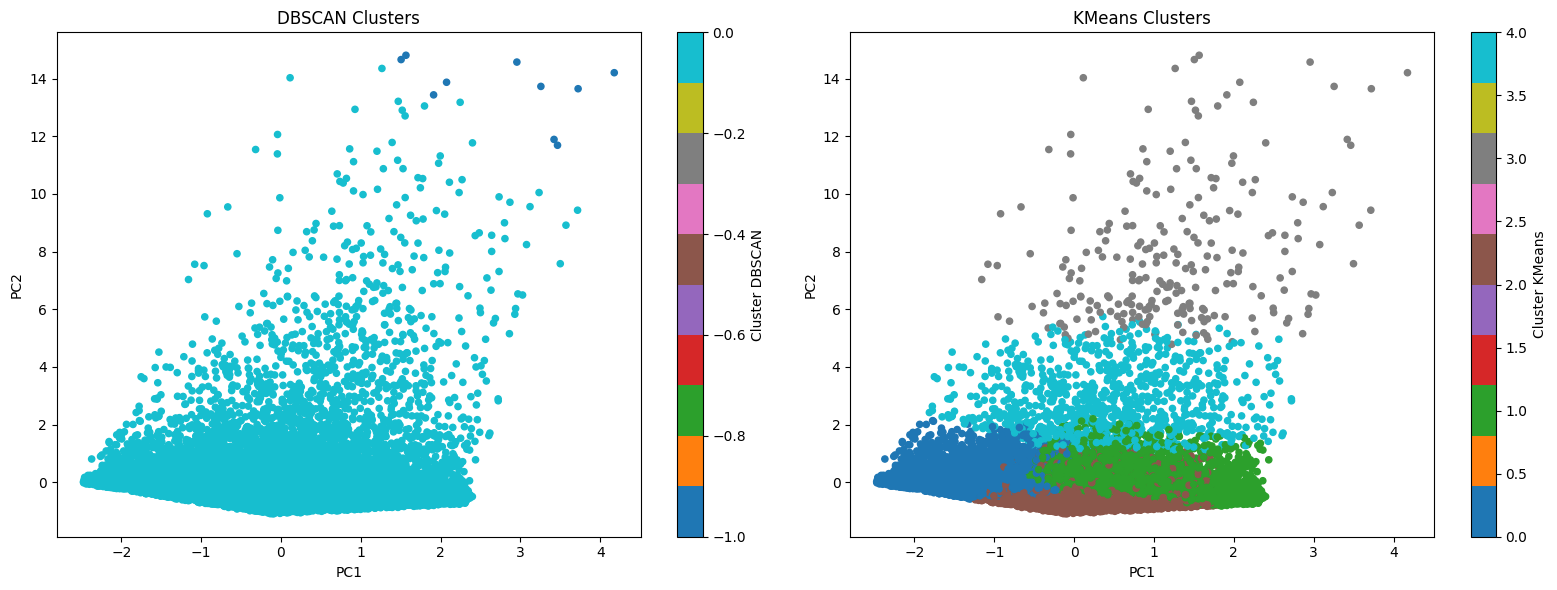

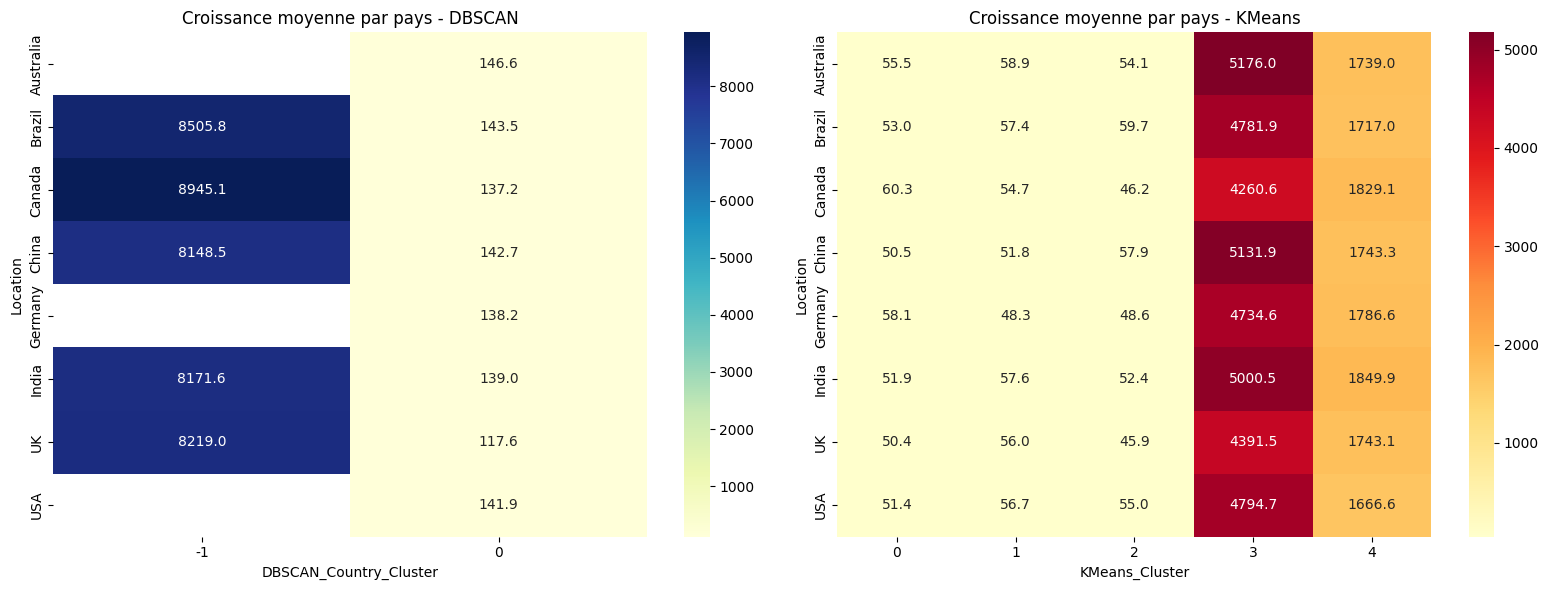

=== Top métiers DBSCAN par cluster ===
Cluster 0: ['Surveyor, insurance', 'Counselling psychologist', 'Charity officer', 'Surveyor, land/geomatics', 'Hydrogeologist']
Cluster -1: ['Customer service manager', 'Psychologist, sport and exercise', 'Advice worker', 'Jewellery designer', 'Paramedic']

=== Top métiers KMeans par cluster ===
Cluster 0: ['Air traffic controller', 'Insurance claims handler', 'Midwife', 'Surveyor, land/geomatics', 'Engineering geologist']
Cluster 1: ['Audiological scientist', 'Tax inspector', 'Osteopath', 'Surveyor, insurance', 'Recruitment consultant']
Cluster 2: ['Counselling psychologist', 'Administrator, Civil Service', 'Air cabin crew', 'Scientific laboratory technician', 'Scientist, audiological']
Cluster 4: ['Librarian, public', 'Chartered legal executive (England and Wales)', 'Theatre manager', 'Research officer, political party', 'Civil Service fast streamer']
Cluster 3: ['Research officer, trade union', 'Pathologist', 'Music tutor', 'Garment/textile tec

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA 2D pour réduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ----------------- Figure 1 : Scatter PCA -----------------
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# DBSCAN
scatter1 = axes[0].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_fe['DBSCAN_Country_Cluster'], cmap='tab10', s=20)
axes[0].set_title("DBSCAN Clusters")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig.colorbar(scatter1, ax=axes[0], label='Cluster DBSCAN')

# KMeans
scatter2 = axes[1].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_fe['KMeans_Cluster'], cmap='tab10', s=20)
axes[1].set_title("KMeans Clusters")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
fig.colorbar(scatter2, ax=axes[1], label='Cluster KMeans')

plt.tight_layout()
plt.show()

# ----------------- Figure 2 : Heatmap croissance moyenne par pays -----------------
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# DBSCAN
heatmap_db = df_fe.groupby(['Location','DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
sns.heatmap(heatmap_db, annot=True, fmt=".1f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Croissance moyenne par pays - DBSCAN")

# KMeans
heatmap_km = df_fe.groupby(['Location','KMeans_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
sns.heatmap(heatmap_km, annot=True, fmt=".1f", cmap="YlOrRd", ax=axes[1])
axes[1].set_title("Croissance moyenne par pays - KMeans")

plt.tight_layout()
plt.show()

# ----------------- Figure 3 : Top métiers par cluster -----------------
print("=== Top métiers DBSCAN par cluster ===")
for cluster in df_fe['DBSCAN_Country_Cluster'].unique():
    top_jobs = df_fe[df_fe['DBSCAN_Country_Cluster']==cluster]['Job_Title'].value_counts().head(5)
    print(f"Cluster {cluster}: {top_jobs.index.tolist()}")

print("\n=== Top métiers KMeans par cluster ===")
for cluster in df_fe['KMeans_Cluster'].unique():
    top_jobs = df_fe[df_fe['KMeans_Cluster']==cluster]['Job_Title'].value_counts().head(5)
    print(f"Cluster {cluster}: {top_jobs.index.tolist()}")
